<a href="https://colab.research.google.com/github/spannozzo/udemi-deep-learning/blob/main/ANN_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Network

### Importing the libraries

In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt


In [7]:
tf.__version__

'2.12.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [8]:
!git clone https://github.com/spannozzo/udemi-deep-learning.git

fatal: destination path 'udemi-deep-learning' already exists and is not an empty directory.


In [9]:
dataset = pd.read_excel('/content/udemi-deep-learning/Folds5x2_pp.xlsx')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [10]:
X[:5]

array([[  14.96,   41.76, 1024.07,   73.17],
       [  25.18,   62.96, 1020.04,   59.08],
       [   5.11,   39.4 , 1012.16,   92.14],
       [  20.86,   57.32, 1010.24,   76.64],
       [  10.82,   37.5 , 1009.23,   96.62]])

### Splitting the dataset into the Training set and Test set

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)



## Part 2 - Building the ANN

### Initializing the ANN

In [12]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [13]:
ann.add(tf.keras.layers.Dense(units=256, activation='relu'))

### Adding the second hidden layer

In [14]:
ann.add(tf.keras.layers.Dense(units=256, activation='relu'))

In [15]:
ann.add(tf.keras.layers.Dense(units=256, activation='relu'))

### Adding the output layer

In [16]:
ann.add(tf.keras.layers.Dense(units=1))

## Part 3 - Training the ANN

### Compiling the ANN

In [17]:
from tensorflow.keras.optimizers import Adam,SGD

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.0001,
    decay_steps=10000,
    decay_rate=0.09)

sgd = SGD(learning_rate=lr_schedule)

adam = Adam(learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False)


In [18]:
ann.compile(optimizer = adam, loss = 'mean_squared_error')

### Training the ANN model on the Training set

In [19]:
h = ann.fit(X_train, y_train, batch_size = 32, epochs = 50, validation_split=0.2)

Epoch 1/50
192/192 [==============================] - 2s 6ms/step - loss: 3466.3982 - val_loss: 204.0951
Epoch 2/50
192/192 [==============================] - 1s 5ms/step - loss: 148.8025 - val_loss: 87.4280
Epoch 3/50
192/192 [==============================] - 1s 5ms/step - loss: 72.2403 - val_loss: 44.9942
Epoch 4/50
192/192 [==============================] - 1s 5ms/step - loss: 44.6038 - val_loss: 37.5749
Epoch 5/50
192/192 [==============================] - 1s 5ms/step - loss: 38.0645 - val_loss: 30.5793
Epoch 6/50
192/192 [==============================] - 1s 6ms/step - loss: 34.8689 - val_loss: 28.4242
Epoch 7/50
192/192 [==============================] - 1s 8ms/step - loss: 34.9100 - val_loss: 30.1121
Epoch 8/50
192/192 [==============================] - 1s 7ms/step - loss: 32.3447 - val_loss: 29.9957
Epoch 9/50
192/192 [==============================] - 1s 5ms/step - loss: 33.1063 - val_loss: 25.8804
Epoch 10/50
192/192 [==============================] - 1s 5ms/step - loss: 30.

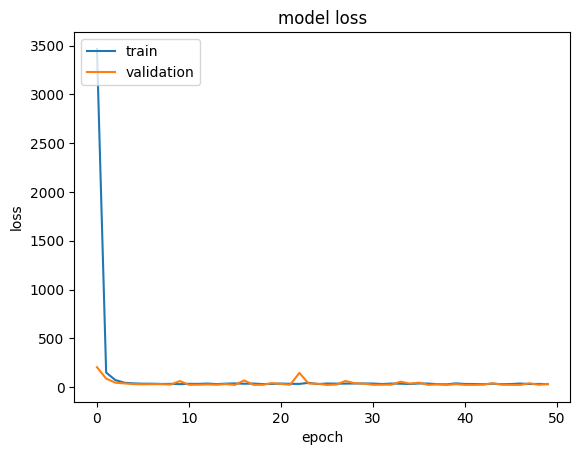

In [20]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Predicting the results of the Test set

In [21]:
y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

60/60 [==============================] - 0s 2ms/step
[[429.9  431.23]
 [457.81 460.01]
 [464.21 461.14]
 ...
 [470.9  473.26]
 [436.53 438.  ]
 [454.93 463.28]]
